In [6]:
############################################################################
# reads in two files, one which says what type of aprticle is present in a frame, and the other file is the actual frame of pixels itself
# this is done for seperate sets of data, but the results are put into the same arrays and shared etc.
# works out the total count (i.e. the total pixel value un a frame) / the number of non-zero pixels in the frame
# plots a histogram of the results for each type of particle
############################################################################

# This is a test cell to make sure that the code waorked for 1 file, so it could then be put in a loop
import pandas as pd
import numpy as np

# get file
file = "C:\\Users\\Butter\\Desktop\\Machine Learning\\Raw Data\\6000 frames up 1\\Frame-0033.txt"

# read file
data = pd.read_table(file, header=None, delimiter=' ', nrows=256) 
data = data.iloc[:, :]
rows, cols = data.shape
na = np.array(data)
na[112][231] -= 0.5
na[139][224] -= 0.5

# get total pixel value
total = np.sum(na)
print("total", total)

# get number of "zero" pixels and "non-zero" pixels
pix, non_pix = 0, 0
for i in range(256):
    for j in range(256):
        if na[i][j] == 0.0:
            pix += 1
        elif na[i][j] != 0.0:
            non_pix += 1
print("no. of pixels", pix, "non-pixels", non_pix, "total no. of pixels", (pix+non_pix))

# get average pixel values
avg_val = total / non_pix
print("average value", avg_val)

#get max values
max_value = np.max(na)
print("max value", max_value)


total 744.9572119999999
no. of pixels 65504 non-pixels 32 total no. of pixels 65536
average value 23.279912874999997
max value 104.985803


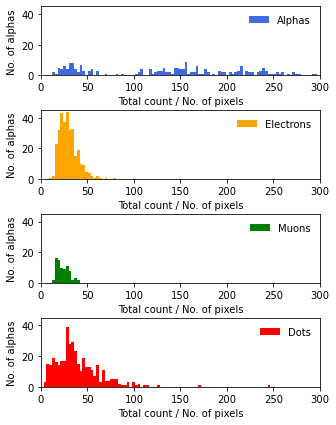

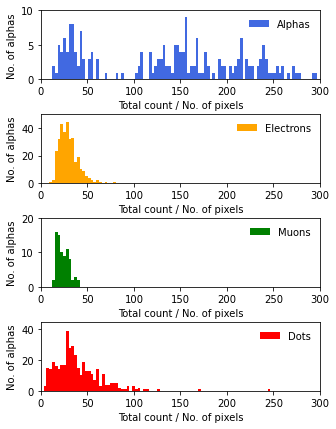

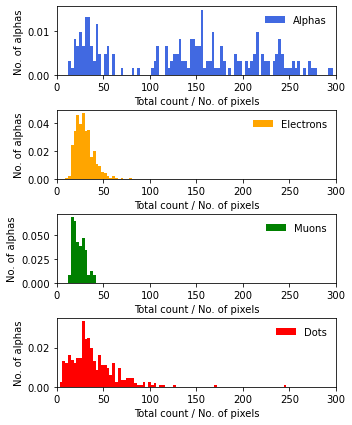

In [7]:
import matplotlib.pyplot as plt

# class directories are used to get which type of particle is in file
# data drectories have the .txt files that contain the canvas/pixel data
class_directory1 = "C:\\Users\\Butter\\Desktop\\Machine Learning\\Sorted Data\\6000 frames up 1\\File Names + particle.txt"
class_directory2 = "C:\\Users\\Butter\\Desktop\\Machine Learning\\Sorted Data\\6000 frames up 2\\File Names + particle.txt"
data_directory1 = "C:\\Users\\Butter\\Desktop\\Machine Learning\\Raw Data\\6000 frames up 1\\"
data_directory2 = "C:\\Users\\Butter\\Desktop\\Machine Learning\\Raw Data\\6000 frames up 2\\"

# read in the data that says which frames contain what particles
f = open(class_directory1,"r")
lines1 = f.readlines()

f = open(class_directory2,"r")
lines2 = f.readlines()

avg_count_A, avg_count_E, avg_count_M, avg_count_D, avg_count_blank = [], [], [], [], []

for i in range(len(lines1)):
    data_class = lines1[i][-2] # get particle type
    frame_name = lines1[i][0:10] # get frame number
    # read in pixel data file and paaned data to an array
    file = open(data_directory1 + frame_name + ".txt")
    data = pd.read_table(file, header=None, delimiter=' ', nrows=256) 
    data = data.iloc[:, :]
    rows, cols = data.shape
    na = np.array(data)
    #remove hot pixels
    na[112][231] -= 0.5
    na[139][224] -= 0.5

    total = np.sum(na)
    
    # finds the number of pixels with a non-zero value
    non_pix = 0
    for i in range(256):
        for j in range(256):
            if na[i][j] != 0.0:
                non_pix += 1
    # work out the total count / no. of non-zero pixels and add it to an array based on its particle type
    avg_val = total / non_pix
    
    if data_class == "A":
        avg_count_A.append(avg_val)
    elif data_class == "E":
        avg_count_E.append(avg_val)
    elif data_class == "M":
        avg_count_M.append(avg_val)
    elif data_class == "D":
        avg_count_D.append(avg_val)
    elif data_class == "-":
        avg_count_blank.append(avg_val)

# repeat the same process for the second set of data
for i in range(len(lines2)):
    data_class = lines2[i][-2]
    frame_name = lines2[i][0:10]
    file = open(data_directory2 + frame_name + ".txt")
    data = pd.read_table(file, header=None, delimiter=' ', nrows=256) 
    data = data.iloc[:, :]
    rows, cols = data.shape
    na = np.array(data)
    na[112][231] -= 0.5
    na[139][224] -= 0.5

    # get total pixel value
    total = np.sum(na)
    #print(total)
    
    non_pix = 0
    for i in range(256):
        for j in range(256):
            if na[i][j] != 0.0:
                non_pix += 1
    
    avg_val = total / non_pix
    
    if data_class == "A":
        avg_count_A.append(avg_val)
    elif data_class == "E":
        avg_count_E.append(avg_val)
    elif data_class == "M":
        avg_count_M.append(avg_val)
    elif data_class == "D":
        avg_count_D.append(avg_val)
    elif data_class == "-":
        avg_count_blank.append(avg_val)

# get the maximum x value so that the binning can be set so that each histogram has equal binning
max_value = max(max(avg_count_A), max(avg_count_E), max(avg_count_M), max(avg_count_D), max(avg_count_blank))
max_value_1 = int(max_value)+1
#print(max_value,max_value_1)

max_x_value = 300
bins = np.linspace(0,max_value_1,180)

# n is the number of objects in each bin, this finds the max value so that a y limit can be set
n_e, bins = np.histogram(avg_count_E, bins=bins)
n_d, bins = np.histogram(avg_count_D, bins=bins)
n_a, bins = np.histogram(avg_count_A, bins=bins)
n_m, bins = np.histogram(avg_count_M, bins=bins)
n = max(max(n_e),max(n_d),max(n_a),max(n_m))

# plot the data in separate histograms in the same image
# in this image, all histograms have the same y axis limts
plt.figure(figsize=(5,7))

plt.subplots_adjust(hspace= 0.5)

plt.subplot(4,1,1)
plt.hist(avg_count_A, bins=bins, color="royalblue",label="Alphas")
plt.xlim(0,max_x_value)
plt.ylim(0,n+1)
plt.xlabel("Total count / No. of pixels")
plt.ylabel("No. of alphas")
plt.legend(edgecolor="None")

plt.subplot(4,1,2)
plt.hist(avg_count_E, bins=bins, color="orange",label="Electrons")
plt.xlim(0,max_x_value)
plt.ylim(0,n+1)
plt.xlabel("Total count / No. of pixels")
plt.ylabel("No. of alphas")
plt.legend(edgecolor="None")

plt.subplot(4,1,3)
plt.hist(avg_count_M, bins=bins, color="green",label="Muons")
plt.xlim(0,max_x_value)
plt.ylim(0,n+1)
plt.xlabel("Total count / No. of pixels")
plt.ylabel("No. of alphas")
plt.legend(edgecolor="None")

plt.subplot(4,1,4)
plt.hist(avg_count_D, bins=bins, color="red",label="Dots")
plt.xlim(0,max_x_value)
plt.ylim(0,n+1)
plt.xlabel("Total count / No. of pixels")
plt.ylabel("No. of alphas")
plt.legend(edgecolor="None")
#plt.show()

plt.savefig("Distribution - same limits.jpg",dpi=500, bbox_inches='tight',pad_inches = 0.03)


# in this image, each histogram has a different y limit best suited to show that data
plt.figure(figsize=(5,7))

plt.subplots_adjust(hspace= 0.5)

plt.subplot(4,1,1)
plt.hist(avg_count_A, bins=bins, color="royalblue",label="Alphas")
plt.xlim(0,max_x_value)
#plt.ylim(0,n)
plt.ylim(0,10)
plt.xlabel("Total count / No. of pixels")
plt.ylabel("No. of alphas")
plt.legend(edgecolor="None")

plt.subplot(4,1,2)
plt.hist(avg_count_E, bins=bins, color="orange",label="Electrons")
plt.xlim(0,max_x_value)
#plt.ylim(0,n)
plt.ylim(0,50)
plt.xlabel("Total count / No. of pixels")
plt.ylabel("No. of alphas")
plt.legend(edgecolor="None")

plt.subplot(4,1,3)
plt.hist(avg_count_M, bins=bins, color="green",label="Muons")
plt.xlim(0,max_x_value)
#plt.ylim(0,n)
plt.ylim(0,20)
plt.xlabel("Total count / No. of pixels")
plt.ylabel("No. of alphas")
plt.legend(edgecolor="None")

plt.subplot(4,1,4)
plt.hist(avg_count_D, bins=bins, color="red",label="Dots")
plt.xlim(0,max_x_value)
#plt.ylim(0,n)
plt.ylim(0,45)
plt.xlabel("Total count / No. of pixels")
plt.ylabel("No. of alphas")
plt.legend(edgecolor="None")
#plt.show()

plt.savefig("Distribution - different limits.jpg",dpi=500, bbox_inches='tight',pad_inches = 0.03)


# in this image, the data has been normalised (thats what the density=True part does a few lines down)
plt.figure(figsize=(5,7))

plt.subplots_adjust(hspace= 0.5)

plt.subplot(4,1,1)
plt.hist(avg_count_A, bins=bins, color="royalblue", density=True, label="Alphas")
plt.xlim(0,max_x_value)
plt.xlabel("Total count / No. of pixels")
plt.ylabel("No. of alphas")
plt.legend(edgecolor="None")

plt.subplot(4,1,2)
plt.hist(avg_count_E, bins=bins, color="orange", density=True,label="Electrons")
plt.xlim(0,max_x_value)
#plt.ylim(0,0.75)
plt.xlabel("Total count / No. of pixels")
plt.ylabel("No. of alphas")
plt.legend(edgecolor="None")

plt.subplot(4,1,3)
plt.hist(avg_count_M, bins=bins, color="green", density=True,label="Muons")
plt.xlim(0,max_x_value)
plt.xlabel("Total count / No. of pixels")
plt.ylabel("No. of alphas")
plt.legend(edgecolor="None")

plt.subplot(4,1,4)
plt.hist(avg_count_D, bins=bins, color="red", density=True,label="Dots")
plt.xlim(0,max_x_value)
plt.xlabel("Total count / No. of pixels")
plt.ylabel("No. of alphas")
plt.legend(edgecolor="None")

plt.savefig("Distribution - normalised.jpg",dpi=500, bbox_inches='tight',pad_inches = 0.03)